In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyecharts.charts import Map
from pyecharts import options as opts
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
Movein=pd.read_excel(r'./AI 2020 04 data01.xlsx',sheet_name='迁入',index_col=[0,1])
Moveout=pd.read_excel(r'./AI 2020 04 data01.xlsx',sheet_name='迁出',index_col=[0,1])
WH_move_bili=pd.read_excel(r'./AI 2020 04 data01.xlsx',sheet_name='1.17-1.23武汉迁出比例',index_col=[0,1])

In [3]:
Disease_data=pd.read_excel(r'./AI 2020 04 data01.xlsx',sheet_name='疫情数据（累计）',index_col=[0,1])

In [4]:
Train=pd.read_excel(r'./训练集.xlsx',index_col=[0,1])
Test=pd.read_excel(r'./测试集.xlsx',index_col=[0,1])

In [5]:
disase_provence=(pd.DataFrame(Disease_data.iloc[:,-1]).reset_index()).groupby(by='单位：人（空白为该时间点数据没有记录）').sum()

In [6]:
keys=disase_provence.index.tolist()
values=disase_provence.values.reshape(34,).tolist()

# 1. 画出各地区疫情严重程度(截至2.6累计确诊)

In [7]:
map=Map()

map.set_global_opts(
title_opts=opts.TitleOpts(title="20200206各地区疫情"),
    visualmap_opts=opts.VisualMapOpts(max_=22112, is_piecewise=True,
                                      pieces=[
                                        {"max": 23000, "min": 2000, "label": ">2000", "color": "#8A0808"},
                                        {"max": 2000, "min": 1000, "label": "1000-2000", "color": "#B40404"},
                                        {"max": 1000, "min": 100, "label": "100-1000", "color": "#DF0101"},
                                        {"max": 100, "min": 10, "label": "10-100", "color": "#F78181"},
                                        {"max": 10, "min": 0, "label": "0-10", "color": "#F5A9A9"},
                                        {"max": 0, "min": 0, "label": "0", "color": "#fff"},
                                        ])  #最大数据范围，分段
    )
map.add('20200206各地区疫情',data_pair=list(dict(zip(keys,values)).items()),maptype='china',is_roam=True)

map.render_notebook()

# 结论:
# 1.从图可看出,疫情的走势从发源地开始，依次向外传播
# 2.疫情严重程度跟人口密度有很大的关系
# 3.跟地区人口流动也有关系

# 2.湖北省的疫情数据(2.6累计新增)

In [8]:
area_hubei=[]
for i in Disease_data.loc['湖北'].index.tolist():
    i=i+'市'
    area_hubei.append(i)

area_hubei[-3]='恩施土家族苗族自治州'

area_hubei[-1]='神农架林区'

In [9]:
people_hubei=dict(zip(area_hubei,Disease_data.loc['湖北'].iloc[:,-1].values.tolist()))

hubeimap=Map()

hubeimap.set_global_opts(
title_opts=opts.TitleOpts(title="湖北各地区疫情"),
    visualmap_opts=opts.VisualMapOpts(max_=11618, is_piecewise=True,
                                      pieces=[
                                        {"max": 15000, "min": 2000, "label": ">2000", "color": "#8A0808"},
                                        {"max": 2000, "min": 1000, "label": "1000-2000", "color": "#B40404"},
                                        {"max": 1000, "min": 500, "label": "500-1000", "color": "#DF0101"},
                                        {"max": 500, "min": 100, "label": "100-500", "color": "#F78181"},
                                        {"max": 100, "min": 10, "label": "10-100", "color": "#F5A9A9"},
                                        ], )  #最大数据范围，分段
    )
hubeimap.add('湖北各地区累计人数(2020206)',
             data_pair=list(people_hubei.items())
             ,maptype='湖北',is_roam=True)
hubeimap.render_notebook()

# 结论:
# 1.湖北省内，越靠近发源地(武汉)的越严重
# 2.武汉迁入孝感，黄冈的人数较多

# 3.对疫情较严重的地区进行分析(春节期间,春运)

3.1 武汉，孝感，黄冈(迁入)

In [10]:
Movein_Bad_areas = Movein.iloc[:3]

In [11]:
Movein_Bad_areas

1.10  1.11  1.12  1.13  1.14  1.15  1.16  \
迁徙规模指数（单位）：反映迁入或迁出人口规模，城市间可横向对比 地区                                             
湖北                              武汉  4.60  4.64  4.37  4.83  4.08  4.06  4.00   
                                孝感  1.41  1.69  1.58  1.43  1.44  1.59  1.55   
                                黄冈  1.87  2.23  2.34  2.14  2.24  2.58  2.71   

                                    1.17  1.18  1.19  1.20  1.21  1.22  1.23  \
迁徙规模指数（单位）：反映迁入或迁出人口规模，城市间可横向对比 地区                                             
湖北                              武汉  4.40  4.23  4.15  4.18  4.24  2.90  1.75   
                                孝感  1.68  2.03  2.22  2.46  2.96  3.01  2.93   
                                黄冈  3.09  3.65  3.38  3.56  4.33  4.01  3.40   

                                    1.24  
迁徙规模指数（单位）：反映迁入或迁出人口规模，城市间可横向对比 地区        
湖北                              武汉  0.88  
                                孝感  1.34  
                                黄冈  1.58

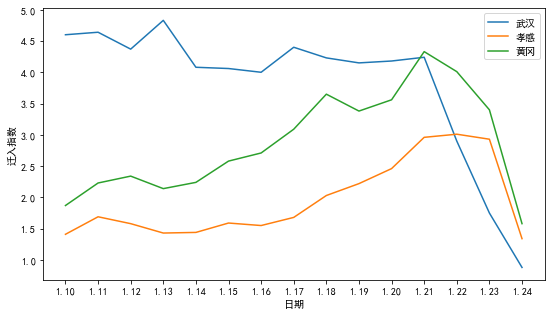

In [12]:
plt.figure(figsize=(9,5))
plt.plot(Movein_Bad_areas.columns,Movein_Bad_areas.iloc[0],label='武汉')
plt.plot(Movein_Bad_areas.columns,Movein_Bad_areas.iloc[1],label='孝感')
plt.plot(Movein_Bad_areas.columns,Movein_Bad_areas.iloc[2],label='黄冈')
plt.xlabel('日期')
plt.ylabel('迁入指数')
plt.xticks(Movein_Bad_areas.columns)
plt.legend()
plt.show()

# 结论:
# 1.在22号前（春节之前），各地方迁入呈上升趋势
# 2.在21后过后疫情爆发后，这三个地区的迁入指数明显下降
# 3.在23号，武汉宣布封城之后，武汉的迁入达到最低

3.2主要地区迁出(武汉,北上广深)

In [13]:
MajorAreas=Moveout.loc[[('湖北','武汉'),('北京','北京'),('上海','上海'),('广东','广州'),('广东','深圳')]]

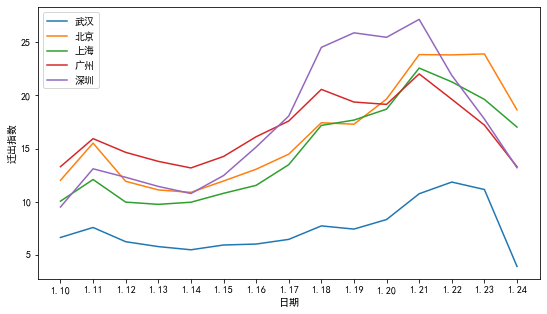

In [14]:
plt.figure(figsize=(9,5))
plt.plot(MajorAreas.columns,MajorAreas.iloc[0],label='武汉')
plt.plot(MajorAreas.columns,MajorAreas.iloc[1],label='北京')
plt.plot(MajorAreas.columns,MajorAreas.iloc[2],label='上海')
plt.plot(MajorAreas.columns,MajorAreas.iloc[3],label='广州')
plt.plot(MajorAreas.columns,MajorAreas.iloc[4],label='深圳')
plt.xlabel('日期')
plt.ylabel('迁出指数')
plt.xticks(MajorAreas.columns)
plt.legend()
plt.show()

# 结论：
# 1.在21号之前为返程高峰期(春运)，21号为返程顶峰
# 2.21号后过后受疫情影响，返程收到较大影响
# 3.23号为武汉封城，在22号武汉迁出达到顶峰

# 4.疫情最严重的二十个城市(除了武汉)

4.1 二十个城市(新增感染人数)

In [15]:
Total_add_people = pd.DataFrame(Test.iloc[:,-1]+Train.iloc[:,-1]).sort_values(by = 0,ascending=False)
Total_add_people.reset_index(inplace=True)
Top_20_x=Total_add_people.iloc[1:21]['地区']
Top_20_y1=Train.loc[[tuple(i) for i in Total_add_people.iloc[1:21][['省份','地区']].values]].iloc[:,-1]

In [16]:
Top_20_y2=Test.loc[[tuple(i) for i in Total_add_people.iloc[1:21][['省份','地区']].values]].iloc[:,-1]

In [17]:
from pyecharts import options as opts
from pyecharts.charts import Bar
bar=(
    Bar()
         .add_xaxis(Top_20_x.values.tolist())
          .add_yaxis("1.24—1.30新增人数", Top_20_y1.tolist())
         .add_yaxis("1.31—2.6新增人数",Top_20_y2.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="二十个城市(新增感染人数)"))
    
    ) 
bar.render_notebook()

4.2 疫情严重二十个城市(迁徙指数)

In [18]:
Top20_qianxi_y1=Train.loc[[tuple(i) for i in Total_add_people.iloc[1:21][['省份','地区']].values]].iloc[:,:14].sum(axis=1)

In [19]:
Top20_qianxi_y2=Test.loc[[tuple(i) for i in Total_add_people.iloc[1:21][['省份','地区']].values]].iloc[:,:14].sum(axis=1)

In [20]:
from pyecharts import options as opts
bar2=(
    Bar()
         .add_xaxis(Top_20_x.values.tolist(),)
          .add_yaxis("1.10—1.16迁徙规模指数", Top20_qianxi_y1.round(decimals=0).tolist())
         .add_yaxis("1.17—1.23迁徙规模指数",Top20_qianxi_y2.round(decimals=0).tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="疫情严重二十个城市(迁徙指数)"))
       .set_series_opts(label_opts=opts.LabelOpts(is_show=True))

    ) 
bar2.render_notebook()

4.3武汉迁入地区比例

In [21]:
Top20_bili_y1=Train.loc[[tuple(i) for i in Total_add_people.iloc[1:21][['省份','地区']].values]].iloc[:,14:21].sum(axis=1)
Top20_bili_y2=Test.loc[[tuple(i) for i in Total_add_people.iloc[1:21][['省份','地区']].values]].iloc[:,14:21].sum(axis=1)

In [22]:
from pyecharts import options as opts
bar3=(
    Bar()
         .add_xaxis(Top_20_x.values.tolist(),)
          .add_yaxis("1.10—1.16武汉迁入地区比例", Top20_bili_y1.tolist())
         .add_yaxis("1.17—1.23武汉迁入地区比例",Top20_bili_y2.tolist())
        .set_global_opts(title_opts=opts.TitleOpts(title="二十个城市(比例)"))
       .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    ) 
bar3.render_notebook()

# 结论：
# 1.通过柱状图分析，武汉人迁出比例与各地新增人数趋势相似
# 2.各地新增人数与各地迁徙指数相关性不强

# 5.通过散点图画出武汉迁入比例和新增感染人数的关系

In [23]:
from sklearn.linear_model import LinearRegression as LR

In [24]:
lr_model = LR()
lr_model.fit(Top20_bili_y1.values.reshape(-1,1),Top_20_y1.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lr_model_17to23 = LR()
lr_model_17to23.fit(Top20_bili_y2.values.reshape(-1,1),Top_20_y2.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y1 = lr_model.coef_[0]*Top20_bili_y1.values+lr_model.intercept_
y2 = lr_model_17to23.coef_[0]*Top20_bili_y2.values+lr_model_17to23.intercept_

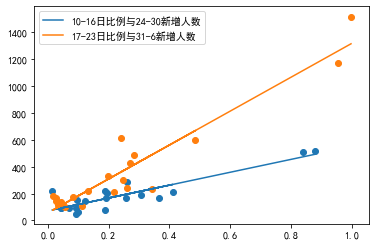

In [27]:
plt.scatter(Top20_bili_y1.tolist(),Top_20_y1.tolist())
plt.scatter(Top20_bili_y2.tolist(),Top_20_y2.tolist())
plt.plot(Top20_bili_y1.values,y1,label='10-16日比例与24-30新增人数')
plt.plot(Top20_bili_y2.values,y2,label='17-23日比例与31-6新增人数')
plt.legend()
plt.show()

# 结论:
# 1.可以看出比例和新增感染人数可以拟合出一条回归线
# 2.这两条回归线斜率差距过大，说明武汉迁入比例虽然与新增人数强相关，但是也不能起决定性的预测作用
